# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [256]:

import scipy.stats as stats
import sklearn
from sklearn.datasets import load_boston
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [257]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [270]:
print(boston.feature_names)
#We replace index with column name
bos.columns = boston.feature_names
bos.head(2)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


ValueError: Length mismatch: Expected axis has 14 elements, new values have 13 elements

In [271]:
print(boston.keys())
print(boston.feature_names)
#print(boston.DESC R)
boston.target.shape

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506,)

In [272]:
#We add price target column with dataset
bos['PRICE'] = boston.target
bos.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [273]:
print("Datashape Row and Column count : ", bos.shape)
print('-'*30)
bos.info()

Datashape Row and Column count :  (506, 14)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [274]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [275]:
bos.isnull().sum()
#In DataFrame there is no null value

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

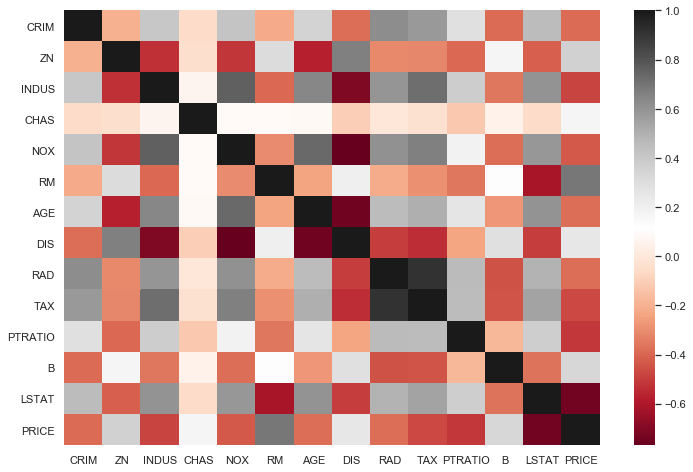

In [276]:

plt.subplots(figsize=(12,8))
sns.heatmap(bos.corr(), cmap = 'RdGy')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE   DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.09  1.0  296.0     15.3   

       B  LSTAT  PRICE  
0  396.9   4.98   24.0  


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


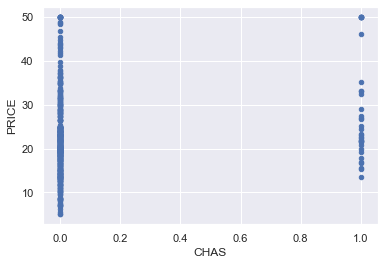

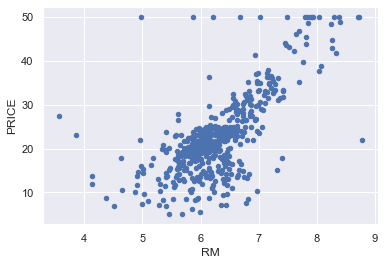

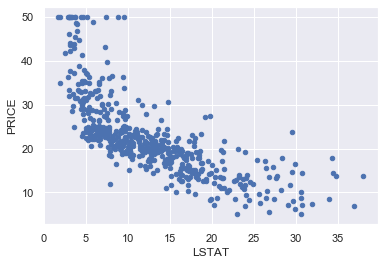

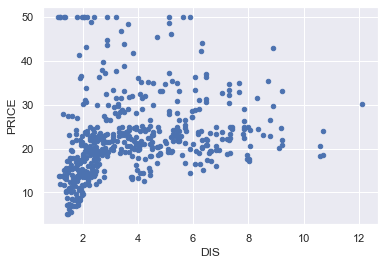

In [277]:
print(bos.head(1))
bos.plot.scatter(x='CHAS', y='PRICE')
bos.plot.scatter(x='RM', y='PRICE')
bos.plot.scatter(x='LSTAT', y='PRICE')
bos.plot.scatter(x='DIS', y='PRICE')

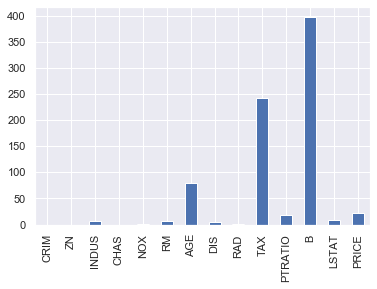

In [278]:
bos.iloc[1].plot(kind='bar')

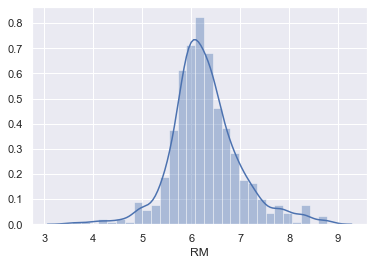

In [279]:
sns.distplot(bos['RM'])

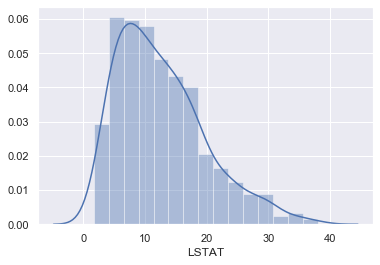

In [280]:
sns.distplot(bos['LSTAT'])

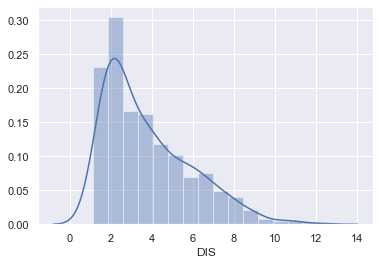

In [281]:
sns.distplot(bos['DIS'])

In [282]:
# In our dataset there so much variation in magntude so we will scale this data.

In [283]:
x= bos.drop('PRICE', axis=1)
y= bos['PRICE']

In [284]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [285]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns

In [286]:
vif
# RAD and TAX  VIF is greater than 5 means there is co llinearity between columns

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [287]:
x = x.drop(['RAD','TAX'],axis=1)
x.head(1)
# I dropped because of multi colinearity in feature based on VIF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,15.3,396.9,4.98


In [288]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scaled
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns
vif
#Now here is no coleaniarity between feature

,VIF,Features
0,1.478206,CRIM
1,2.154483,ZN
2,3.179166,INDUS
3,1.057805,CHAS
4,3.901348,NOX
5,1.872532,RM
6,3.075755,AGE
7,3.954443,DIS
8,1.496077,PTRATIO
9,1.316559,B


---------------------------------------------------------------------


In [289]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=5)


In [290]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)
print(lm.intercept_)
lm.coef_
#Some coefficients are negative here

22.458022804696952


array([-0.6666746 ,  1.09188776, -0.37602195,  0.77502536, -1.33994096,
        2.65184273, -0.11617649, -3.18190347, -1.6346209 ,  0.90687827,
       -4.15024255])

In [291]:
lm.score(x_train,y_train)


0.7229971262862738

In [292]:
lm.score(x_test,y_test)

0.743643062873519

In [293]:
y_pred = lm.predict(x_test)

In [294]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

20.0711763768286

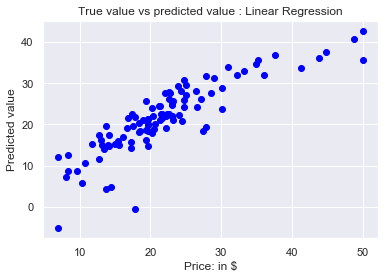

In [314]:
plt.scatter(y_test, y_pred, c = 'blue') 
plt.xlabel("Price: in $") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

--------------------------------------------------------------------------------------------------------------

In [296]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [297]:
alpha = lasscv.alpha_
alpha

0.003426876828377299

In [298]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.003426876828377299, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [299]:
lasso_reg.score(x_test, y_test)

0.7437353669198227

In [300]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.87833007, 4.68092225, 2.91475721, 9.2249859 , 6.16488497,
       9.43055367, 6.02151481, 7.6709296 , 1.8278652 , 7.39252519,
       5.25194545, 4.90646011, 3.81393626, 2.98561104, 8.24736492,
       4.97007238, 0.22557362, 3.65333597, 6.99627662, 2.72521052,
       4.11670091, 9.92117308, 7.24861501, 7.18074302, 5.46617754,
       0.42093402, 9.06171025, 0.48260376, 5.44700577, 0.04551362,
       0.64018669, 8.99959197, 4.99298761, 6.54062852, 7.3456259 ,
       0.53057241, 4.82752533, 5.08397395, 9.95859658, 6.00515738,
       1.81269862, 9.51904734, 6.03325653, 4.500045  , 0.24097469,
       9.72635991, 0.41336398, 6.63498161, 1.85315655, 9.60039523]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [301]:
ridgecv.alpha_

0.045513619315855625

In [302]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.045513619315855625, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

In [303]:
ridge_model.score(x_test, y_test)

0.7436580363682641

In [304]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [305]:
elasticCV.alpha_

0.0675619601856266

In [306]:
elasticCV.l1_ratio

0.5

In [307]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0675619601856266, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [308]:
elasticnet_reg.score(x_test, y_test)

0.7471241746989237

In [309]:
print(x_test.shape)
print(y_test.shape)

(102, 11)
(102,)


We got  same r2 score for all regularization so we can say that our model is not overfitted and well trained model.

In [310]:
y_pred= lm.predict(x_test)

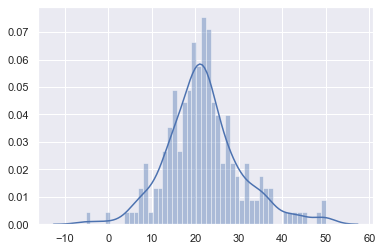

In [313]:
sns.distplot((y_test,y_pred), bins=50)
#Data is normally disributed so our model is working good

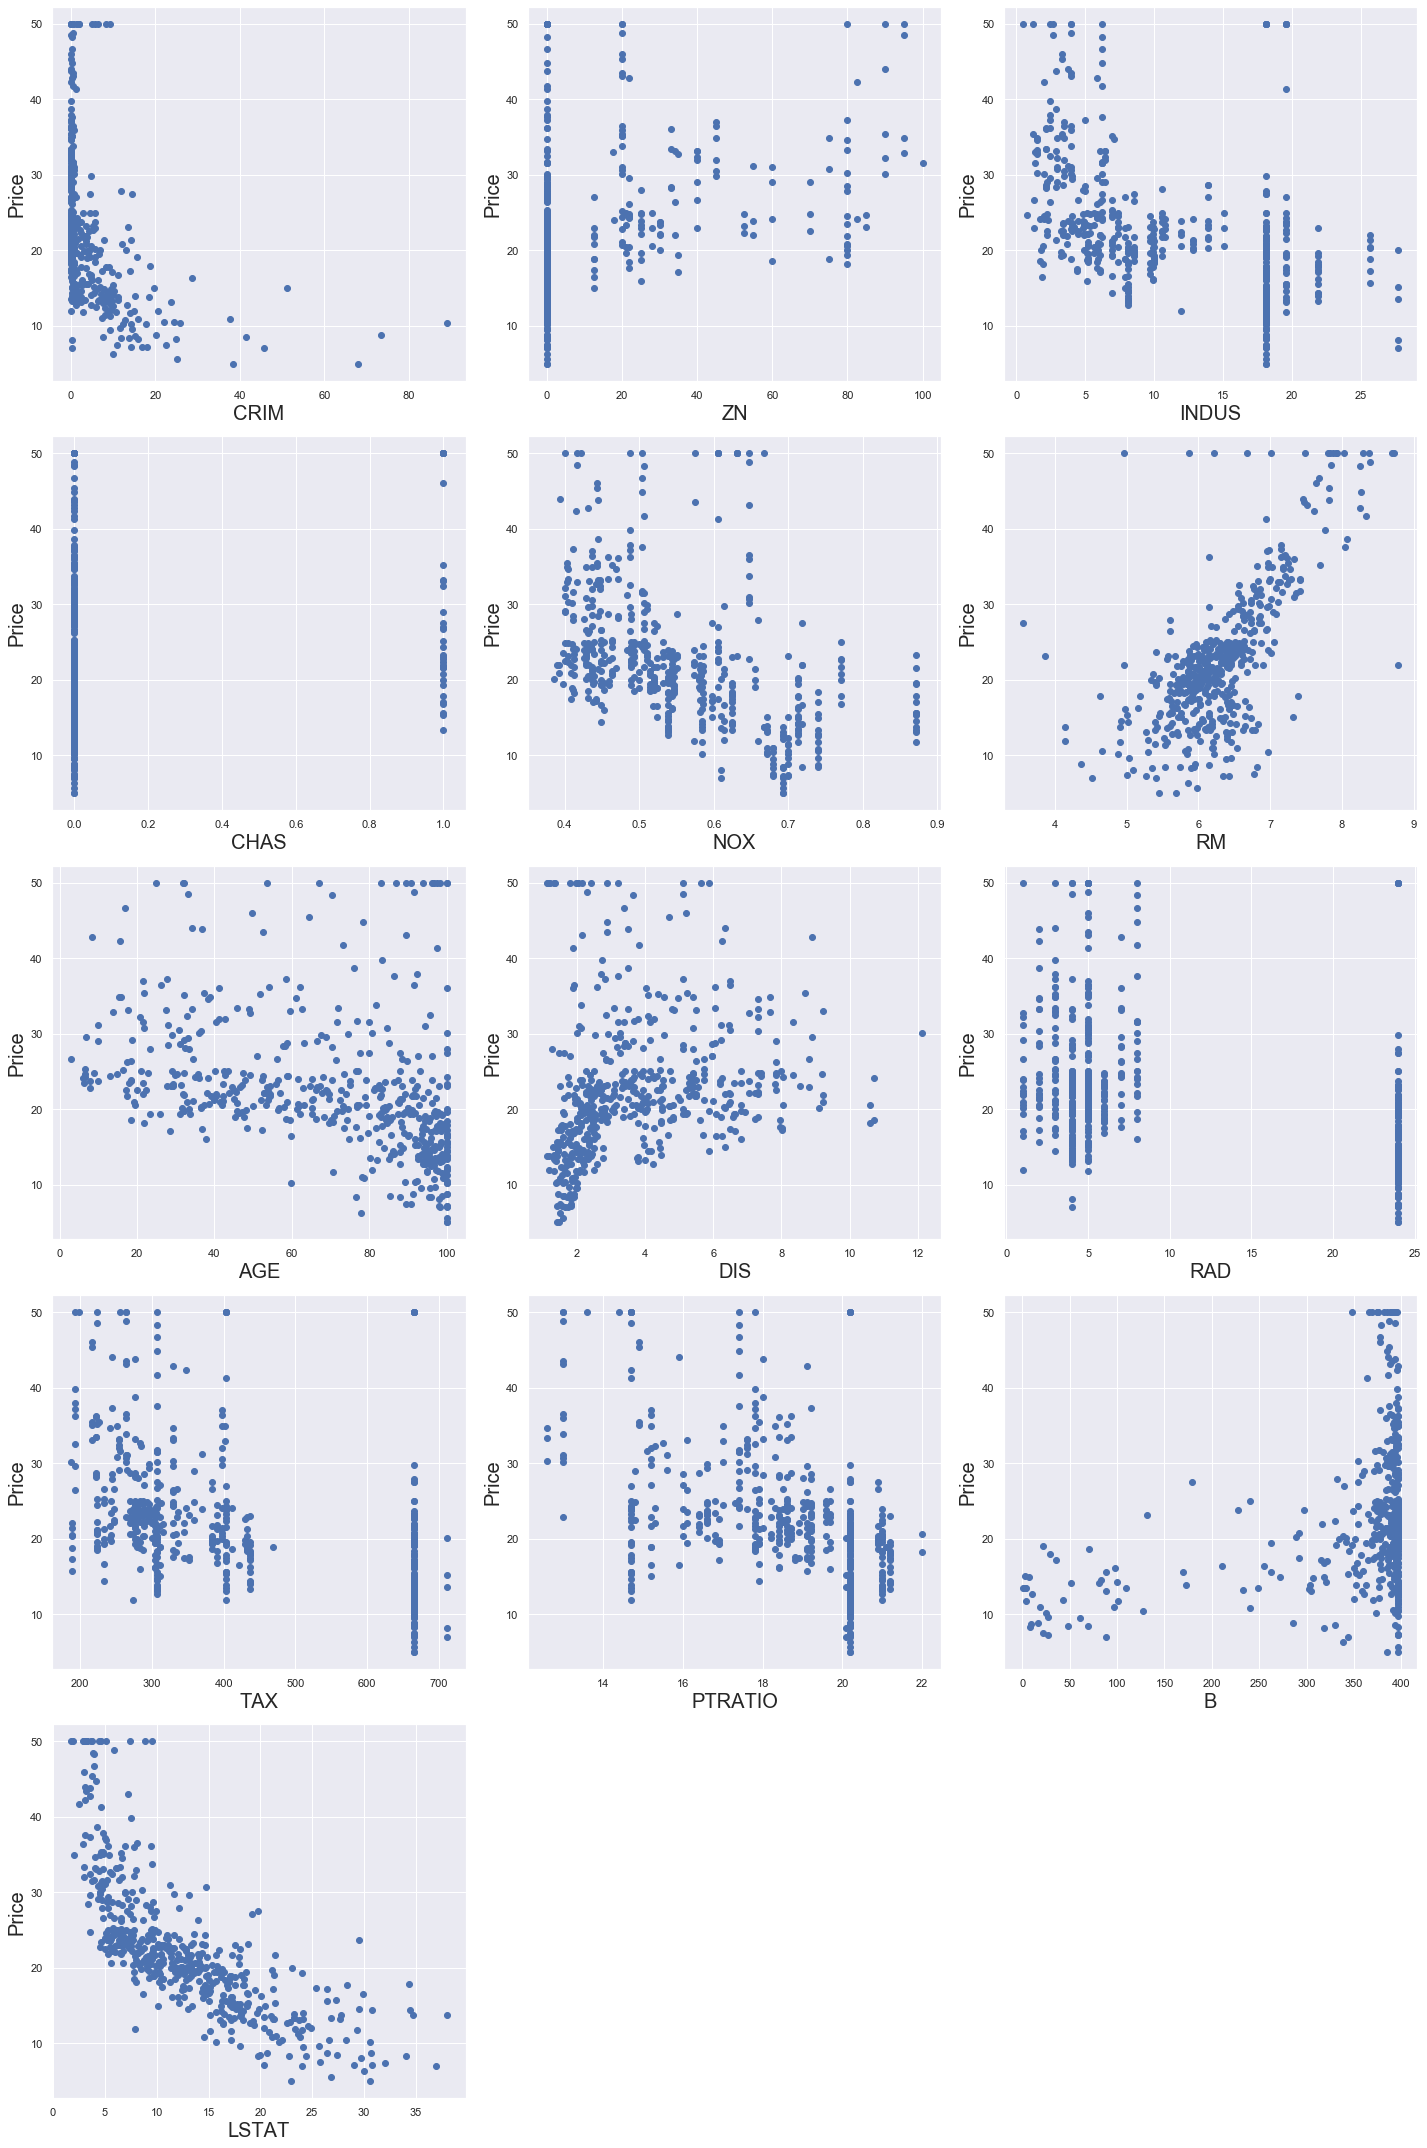

In [161]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

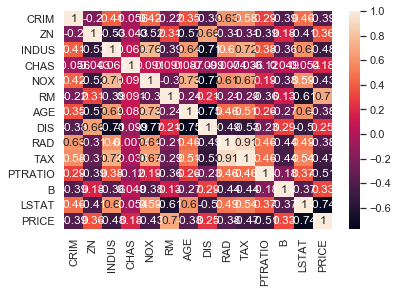

In [22]:

corrMatrix=bos.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()